In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
inp = input().split()
N = int(inp[0])
lamb = float(inp[1])
mu = float(inp[2])
alpha = float(inp[3])
mus = []
customers = 10000000

for i in range(N):
    mus.append(list(map(float, input().split())))

enter = []
t = np.ceil(np.random.exponential(1 / lamb))
for i in range(customers):
    tired = np.ceil(np.random.exponential(alpha))
    priority = 0
    rand = np.random.uniform(0, 1)
    if 0.5 < rand <= 0.7:
        priority = 1
    elif 0.7 < rand <= 0.85:
        priority = 2
    elif 0.85 < rand <= 0.95:
        priority = 3
    elif rand > 0.95:
        priority = 4

    rand = np.random.uniform(0, 1)
    for part in range(N):
        if part / N < rand <= (part + 1) / N:
            break
    enter.append([t, priority, tired, part])
    t += np.ceil(np.random.exponential(1 / lamb))

In [ ]:
def simulator(enter, mus):
    global time, max1, max2, N, lamb, mu, alpha, tired_people, total_system_time, total_waiting_time, lenLines, customer_per_time
    global waiting_time_per_customer, arrayW, arrayA, waitingFreq, responseFreq, response_time_per_customer
    customers = len(enter)
    max1 = -1
    max2 = -1
    time = 1
    line = [list()] * N
    busys = [list()] * N
    ends = [list()] * N
    clerks = [list()] * N
    assign = [list()] * N
    arrayW = [list()] * 5
    arrayA = [list()] * 5
    waitingFreq = [list()] * 5
    responseFreq = [list()] * 5
    response_time_per_customer = [0] * customers
    waiting_time_per_customer = [0] * customers
    lenLines = [list()] * (N + 1)
    lenLines[0] = []
    for i in range(N):
        assign[i] = []
        lenLines[i + 1] = []
        line[i] = [list()] * 5
        busys[i] = [0] * len(mus[i])
        ends[i] = [-1] * len(mus[i])
        clerks[i] = [-1] * len(mus[i])
        for j in range(5):
            line[i][j] = []
    receptionL = [list()] * 5
    for i in range(5):
        receptionL[i] = []
        arrayW[i] = []
        arrayA[i] = []
        waitingFreq[i] = []
        responseFreq[i] = []

    busyR = 0
    endR = 0
    receptionist = -1
    tired_people = 0
    total_system_time = [0] * 5
    total_waiting_time = [0] * 5
    customer_per_time = []
    num_system_people = 0
    number_in_lines = 0
    counter = 0

    while (counter < customers) or (num_system_people > 0):
        while (counter < customers) and (enter[counter][0] == time):
            if busyR == 0:
                if enter[counter][2] <= (time - enter[counter][0]):
                    tired_people += 1
                    total_system_time[enter[counter][1]] += enter[counter][2]
                    counter += 1
                    continue
                serviceT = np.ceil(np.random.exponential(1 / mu))
                endR = time + serviceT
                receptionist = (counter, time)
                busyR = 1
                num_system_people += 1
            else:
                num_system_people += 1
                receptionL[enter[counter][1]].append(counter)
            counter += 1
        
        # reception's ending and assignment
        if (busyR == 1) and ((endR == time) or (enter[receptionist[0]][2] <= (time - enter[receptionist[0]][0]))):
            customer = enter[receptionist[0]]
            timeIn = receptionist[1]
            busyR = 0
            temp = time - timeIn 
            response_time_per_customer[receptionist[0]] += temp
            assignment = False
            if customer[2] <= (time - customer[0]): 
                total_system_time[customer[1]] += temp                           
                tired_people += 1
                num_system_people -= 1
                receptionist = -1
            else:
                total_system_time[customer[1]] += temp
                line[customer[3]][customer[1]].append((receptionist[0], time))
                receptionist = -1        
            for i in range(4, -1, -1):
                while len(receptionL[i]) > 0:
                    customerN = receptionL[i].pop(0)
                    customer = enter[customerN]
                    temp = time - customer[0]
                    waiting_time_per_customer[customerN] += temp
                    total_waiting_time[customer[1]] += temp
                    total_system_time[customer[1]] += temp
                    if customer[2] > (time - customer[0]):
                        serviceT = np.ceil(np.random.exponential(1 / mu))
                        endR = time + serviceT
                        receptionist = (customerN, time)
                        busyR = 1
                        assignment = True
                        break
                    else:
                        tired_people += 1
                        num_system_people -= 1
                if assignment:
                    break

        # tired people in reception's line
        for l in receptionL:
            for c in l:
                customer = enter[c]
                if customer[2] <= (time - customer[0]):
                    tired_people += 1
                    num_system_people -= 1
                    waiting_time_per_customer[c] += customer[2]
                    total_system_time[customer[1]] += customer[2]
                    total_waiting_time[customer[1]] += customer[2]
                    l.remove(c)
        
        # clerks ending and assigning
        for part in range(N):
            for clerk in range(len(clerks[part])):
                if (busys[part][clerk] == 0) or (ends[part][clerk] == time) or (customer[2] <= time - customer[0]):
                    assignment = False
                    if busys[part][clerk] == 1:
                        customerNT = clerks[part][clerk]
                        customerN = customerNT[0]
                        customerTIn = customerNT[1]
                        customer = enter[customerN]
                        num_system_people -= 1
                        temp = time - customerTIn
                        response_time_per_customer[customerN] += temp
                        total_system_time[customer[1]] += temp
                        busys[part][clerk] = 0
                        clerks[part][clerk] = -1 
                    for i in range(4, -1, -1):
                        while len(line[part][i]) > 0:
                            customerNT = line[part][i].pop(0)
                            customerN = customerNT[0]
                            customerTIn = customerNT[1]
                            customer = enter[customerN]
                            temp = time - customerTIn
                            total_system_time[i] += temp
                            total_waiting_time[i] += temp
                            waiting_time_per_customer[customerN] += temp
                            if customer[2] > time - customer[0]:
                                serviceT = np.ceil(np.random.exponential(1 / mus[part][clerk]))
                                ends[part][clerk] = time + serviceT
                                busys[part][clerk] = 1
                                clerks[part][clerk] = (customerN, time)
                                assignment = True
                                break
                            else:
                                num_system_people -= 1
                                tired_people += 1
                        if assignment:
                            break
        # tired people in parts' lines
        for part in range(N):
            for l in line[part]:
                for c in l:
                    customer = enter[c[0]]
                    timeIn = c[1]
                    if customer[2] <= (time - customer[0]):
                        tired_people += 1
                        num_system_people -= 1
                        temp = time - timeIn
                        total_system_time[customer[1]] += temp
                        total_waiting_time[customer[1]] += temp
                        waiting_time_per_customer[c[0]] += temp
                        l.remove(c)

        # length of lines
        num = 0
        for i in range(5):
            num += len(receptionL[i])
        lenLines[0].append(num)
        for i in range(N):
            num = 0
            for j in range(5):
                num += len(line[i][j])
            number_in_lines += num
            lenLines[i + 1].append(num)

        time += 1
        customer_per_time.append(num_system_people)

    time -= 1
    return number_in_lines

In [ ]:
out = simulator(enter, mus)

In [ ]:
# output 1
for q in range(5):
    print("Average system time with priority", q, ":", total_system_time[q] / customers)
print("Average system time for all priorities : ", sum(total_system_time) / customers)

Average system time with priority 0 : 1.9211467
Average system time with priority 1 : 0.6566572
Average system time with priority 2 : 0.4818203
Average system time with priority 3 : 0.3181296
Average system time with priority 4 : 0.1587323
Average system time for all priorities :  3.5364861


In [ ]:
# output 2
for q in range(5):
    print("Average waiting time with priority", q, ":", total_waiting_time[q] / customers)
print("Average waiting time for all priorities: ", sum(total_waiting_time) / customers)

Average waiting time with priority 0 : 0.5485679
Average waiting time with priority 1 : 0.0618207
Average waiting time with priority 2 : 0.0312922
Average waiting time with priority 3 : 0.0164225
Average waiting time with priority 4 : 0.0072445
Average waiting time for all priorities:  0.6653478


In [ ]:
# output 3
print("Total number of people who left the system: ", tired_people)

Total number of people who left the system:  1650368


In [ ]:
# output 4
print("Average length of reception line:", sum(lenLines[0]) / time)
for i in range(N):
    print("Average length of line for part", i, ":", sum(lenLines[i + 1]) / time)

Average length of reception line: 0.5632758673604138
Average length of line for part 0 : 0.006260755148098471
Average length of line for part 1 : 0.006083010183593431
Average length of line for part 2 : 2.567619380252759e-05


In [ ]:
# output 5
# at the end

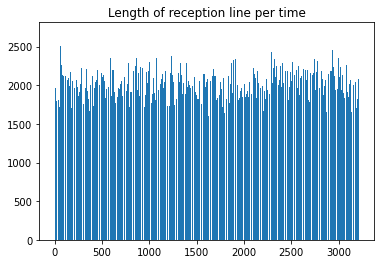

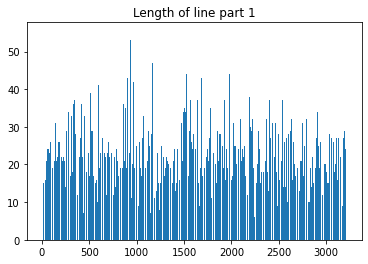

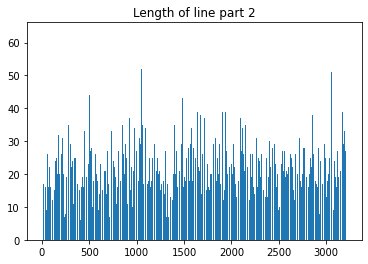

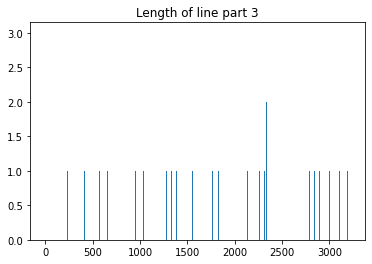

In [ ]:
# output 6
hours = int(np.ceil(time / 3600))
timeLine = [i+1 for i in range(hours)]

for i in range(N + 1):
    ll = []
    for j in range(hours):
        ll.append(sum(lenLines[i][j*3600:(j+1)*3600]))
    if i == 0:
        plt.title("Length of reception line per time")
    else:
        s = "Length of line part " + str(i)
        plt.title(s)
    plt.bar(timeLine, ll)
    plt.show()

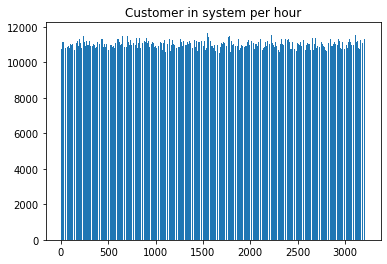

In [ ]:
# output 7
plt.title("Customer in system per hour")
ll = []
for j in range(hours):
    ll.append(sum(customer_per_time[j*3600:(j+1)*3600]))
plt.bar(timeLine, ll)
plt.show()

In [1]:
# Bonus part
# output 1
Ns = [i for i in range(1000, 10000, 10)]
accuracy = []
for i in range(len(Ns)):
  mean = np.mean(waiting_time_per_customer[:Ns[i]])
  sigma = np.std(waiting_time_per_customer[:Ns[i]])
  value = ((sigma*1.96) / (np.sqrt(Ns[i])* mean))
  if value <= 0.05:
    break

print("The number of customers for accuracy higher than 95 is :", Ns[i])

NameError: ignored

In [ ]:
# for output 2 and 3
for i in range(customers):
    arrayW[enter[i][1]].append(waiting_time_per_customer[i])
    arrayA[enter[i][1]].append(response_time_per_customer[i])
    if waiting_time_per_customer[i] > max1:
        max1 = waiting_time_per_customer[i]
    if response_time_per_customer[i] > max2:
        max2 = response_time_per_customer[i]
maxT = int(max(max1, max2))

for i in range(5):
    for j in range(1, maxT + 1):
        waitingFreq[i].append(arrayW[i].count(j))
        responseFreq[i].append(arrayA[i].count(j))

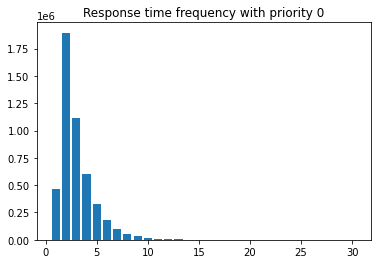

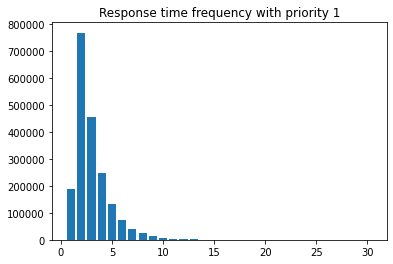

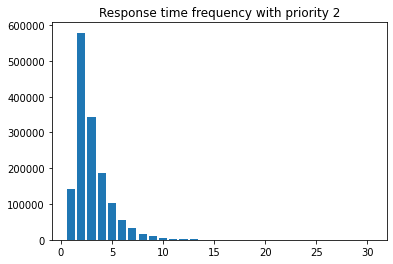

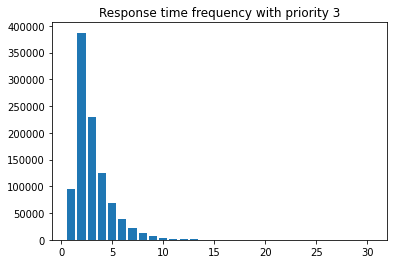

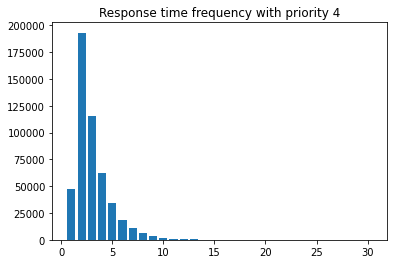

In [ ]:
# output 2
t = [i for i in range(1, maxT + 1)]
for i in range(5):
    s = "Response time frequency with priority " + str(i)
    plt.title(s)
    plt.bar(t, responseFreq[i])
    plt.show()

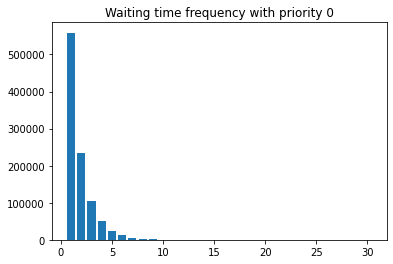

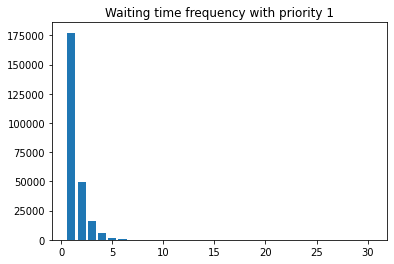

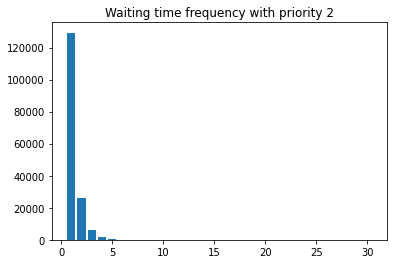

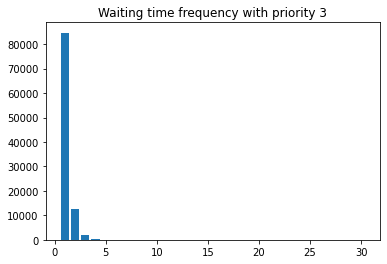

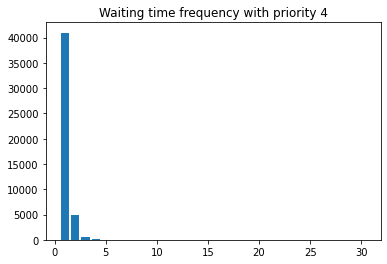

In [ ]:
# output 3
for i in range(5):
    s = "Waiting time frequency with priority " + str(i)
    plt.title(s)
    plt.bar(t, waitingFreq[i])
    plt.show()

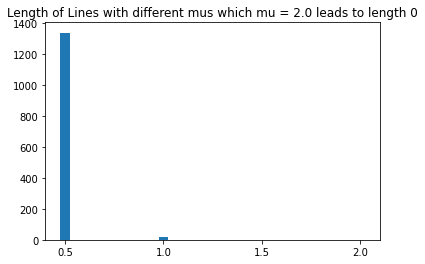

In [ ]:
# output 5
parts = len(mus)
clerks_in_parts = 0
for part in mus:
    clerks_in_parts += len(part)
clerks_in_each_part = int(np.ceil(clerks_in_parts / parts))
ll_per_mu = []
range_mu = []
for i in range(1, 10):
    new_mus = [[i/2] * clerks_in_each_part] * parts
    ll = simulator(enter[:1000000], new_mus)
    range_mu.append(i/2)
    ll_per_mu.append(ll)
    if ll == 0:
        result = i/2
        break

s = "Length of Lines with different mus which mu = " + str(result) + " leads to length 0"
plt.title(s)
plt.xticks(range_mu)
plt.bar(range_mu, ll_per_mu, width=0.05)
plt.show()